# Taller 2: operaciones de transformación del histograma

## Cargue la imagen de trabajo y visualícela.

In [11]:
# Modificar ruta de las imágenes
PATH = './imagenes/'

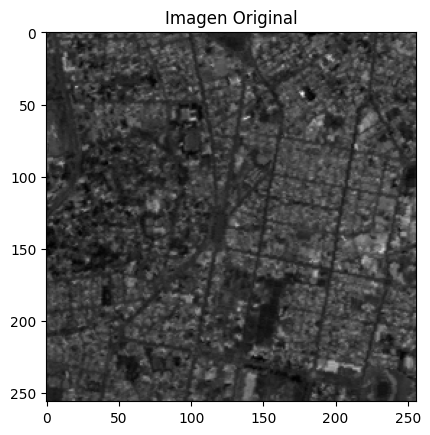

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagen = cv2.imread(PATH + 'QUITO.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(imagen, cmap='gray')
plt.title('Imagen Original')
plt.show()

## Visualice el histograma de la imagen. Describa su forma. ¿Cuáles son los niveles de gris mínimo y máximo?.

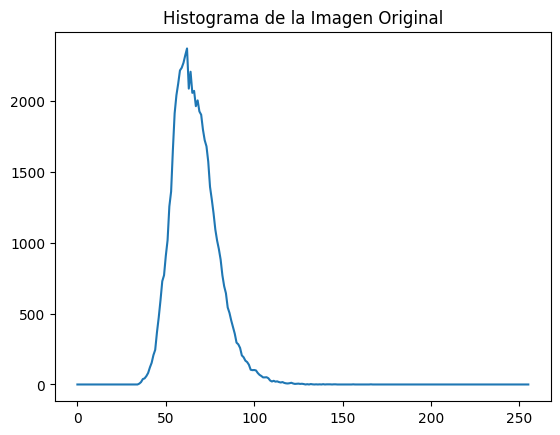

In [13]:
hist = cv2.calcHist([imagen], [0], None, [256], [0, 256])
plt.plot(hist)
plt.title('Histograma de la Imagen Original')
plt.show()

A primera vista, el histograma tiene un pico alto en intensidades oscuras (más cercanas a 0 que a 255). El valor mínimo está aproximadamente en 40 y el valor máximo se acerca a 150. Confirmamos con min y max de numpy.

In [14]:
print('Min:', imagen.min())
print('Max:', imagen.max())

Min: 35
Max: 166


En realidad, el valor mínimo es 35 y el máximo es 166.

## Efectúe una expansión del contraste, visualice la imagen resultado y el histograma correspondiente. ¿En qué consiste la mejora de la imagen?

In [15]:
from skimage import exposure


rescaled_img = exposure.rescale_intensity(imagen\
                ,in_range=(imagen.min(), imagen.max()), out_range=(0, 255))

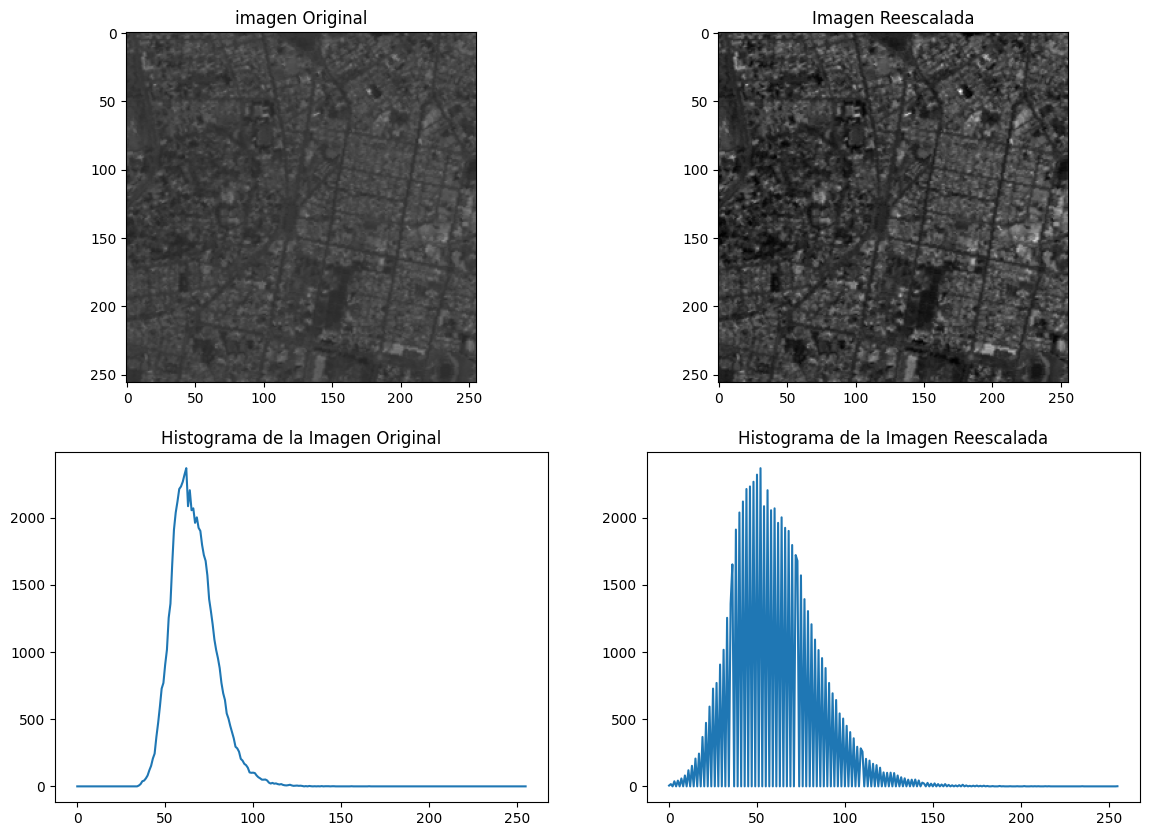

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].imshow(imagen, cmap='gray', vmin=0, vmax=255)
axes[0, 0].set_title('imagen Original')

axes[0, 1].imshow(rescaled_img, cmap='gray', vmin=0, vmax=255)
axes[0, 1].set_title('Imagen Reescalada')

hist_reescaled = cv2.calcHist([rescaled_img.astype(np.uint8)], [0], None, [256], [0, 256])
axes[1, 0].plot(hist)
axes[1, 0].set_title('Histograma de la Imagen Original')
axes[1, 1].plot(hist_reescaled)
axes[1, 1].set_title('Histograma de la Imagen Reescalada')
plt.show()

El objetivo de la expansión es mejorar el contraste de la imagen al ampliar el rango de valores de intensidad y distribuir los valores en este rango más amplio. Esto permite visualizar mejor los detalles de la imagen y los límites de las regiones.

## Efectúe 3 calibraciones diferentes del histograma sobre la imagen original, entre los valores 50-100, 40-120 y 35-166. Visualice los resultados.

In [17]:
rescaled_img_50_100 = exposure.rescale_intensity(imagen\
                ,in_range=(50, 100), out_range=(0, 255))
rescaled_img_40_120 = exposure.rescale_intensity(imagen\
                ,in_range=(40, 120), out_range=(0, 255))
rescaled_img_35_166 = exposure.rescale_intensity(imagen\
                ,in_range=(35, 166), out_range=(0, 255))

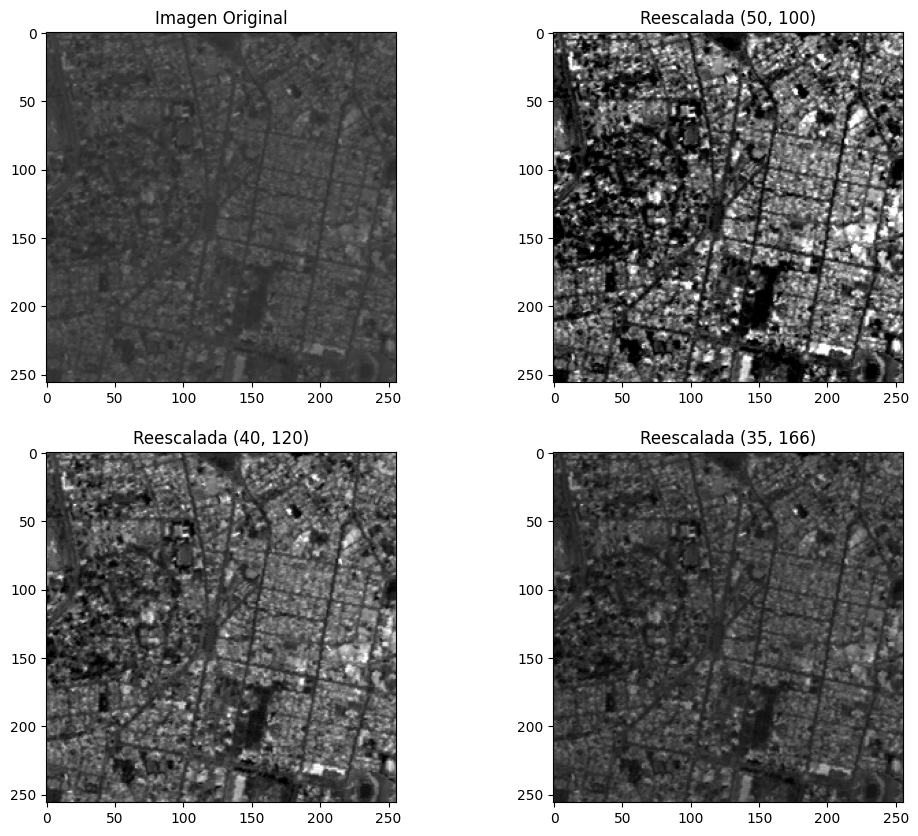

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].imshow(imagen, cmap='gray', vmin=0, vmax=255)
axes[0, 0].set_title('Imagen Original')
axes[0, 1].imshow(rescaled_img_50_100, cmap='gray', vmin=0, vmax=255)
axes[0, 1].set_title('Reescalada (50, 100)')
axes[1, 0].imshow(rescaled_img_40_120, cmap='gray', vmin=0, vmax=255)
axes[1, 0].set_title('Reescalada (40, 120)')
axes[1, 1].imshow(rescaled_img_35_166, cmap='gray', vmin=0, vmax=255)
axes[1, 1].set_title('Reescalada (35, 166)')
plt.show()

/tmp/ipykernel_15718/2982690639.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


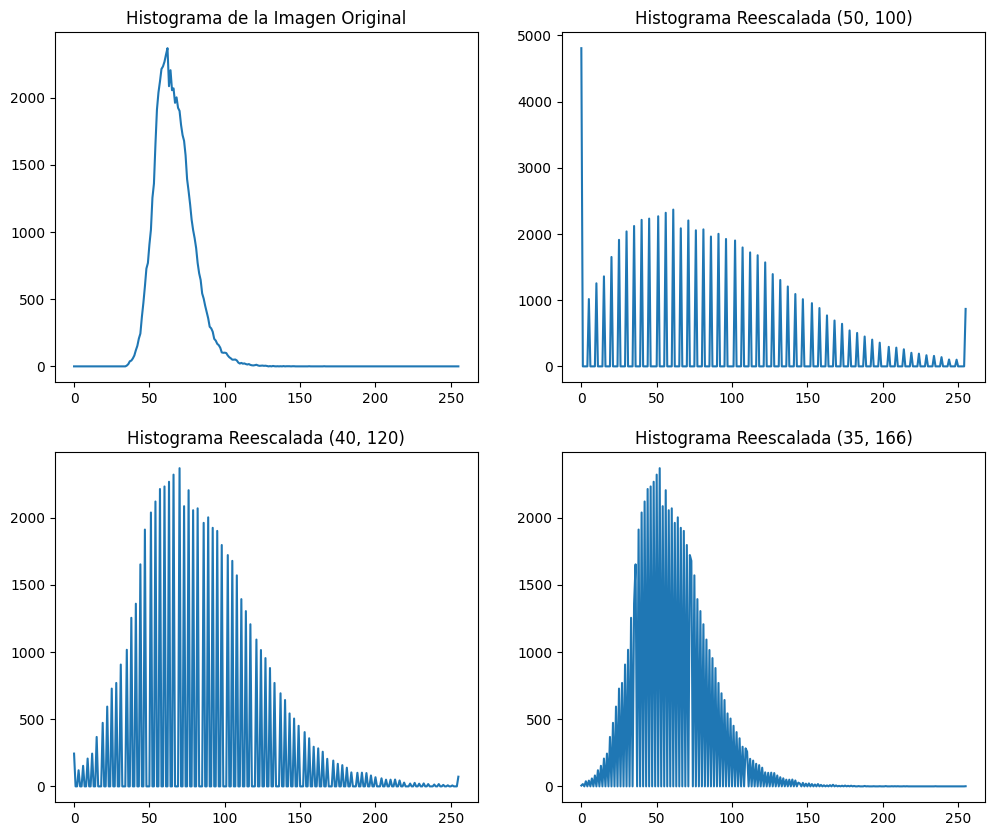

In [19]:
plt, axs = plt.subplots(2, 2, figsize=(12, 10))
axs[0, 0].plot(hist)
axs[0, 0].set_title('Histograma de la Imagen Original')
hist_50_100 = cv2.calcHist([rescaled_img_50_100.astype(np.uint8)], [0], None, [256], [0, 256])
axs[0, 1].plot(hist_50_100)
axs[0, 1].set_title('Histograma Reescalada (50, 100)')
hist_40_120 = cv2.calcHist([rescaled_img_40_120.astype(np.uint8)], [0], None, [256], [0, 256])
axs[1, 0].plot(hist_40_120)
axs[1, 0].set_title('Histograma Reescalada (40, 120)')
hist_35_166 = cv2.calcHist([rescaled_img_35_166.astype(np.uint8)], [0], None, [256], [0, 256])
axs[1, 1].plot(hist_35_166)
axs[1, 1].set_title('Histograma Reescalada (35, 166)')
plt.show()

## ¿Cuál es la diferencia entre estas imágenes? ¿Cuál presenta el mejor contraste? ¿Cuál permite ver mejor los detalles? ¿Por qué la calibración entre 35 y 166 da el mismo resultado que la expansión del contraste efectuada en el punto 4? ¿Conclusión?

En la imagen reescalada entre (50, 100) podemos ver un alto contraste que permite ver mejor la imagen, pero también vemos que está bastante saturada por los valores extremos (blanco y negro). Al tener un rango más pequeño en comparación a los demás rangos con lo que reescalamos, la imagen se ve muy brillante dado que muchos valores van al extremo de 255.

Por otra parte, la reescalada (40, 120) ofrece un buen balance entre contraste y preservación de información. En este imagen podemos distinguir mejor los detalles y la imagen no se ve excesivamente saturada. La (50, 100) pierde detalles por saturación en zonas muy claras u oscuras.

La calibración (35, 166) mapea estos valores a [0, 255] respectivamente. Debido a que 35 y 166 son el valor mínimo y máximo de intensidad de la imagen original, esta operación es exactamente igual a la expansión lineal del contraste del punto 4, que consiste en llevar el mínimo a 0 y el máximo a 255. Ambas transformaciones aplican la misma función lineal.

**Conclusión:** Elegir rangos muy pequeños (50-100) genera alto contraste, pero con pérdida de información. Los valores extremos hacen que la imagen se vea más brillante de lo que realmente es y hace que se pierdan detalles. Usar el rango natural de la imagen (35-166) optimiza el contraste sin saturación, mejorando la calidad de la imagen y descubriendo bordes que permiten distinguir mejor las regiones de la imagen original.